<a href="https://www.kaggle.com/code/barkamolurinboev/aviachipta-narxini-taxmin-qilish?scriptVersionId=106378582" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv


In [2]:
df = pd.read_csv("../input/aviachipta-narxini-bashorat-qilish/train_data.csv")
df2 = pd.read_csv("../input/aviachipta-narxini-bashorat-qilish/test_data.csv")
sample_solution = pd.read_csv("../input/aviachipta-narxini-bashorat-qilish/sample_solution.csv")
print(df.head())

   id   airline   flight source_city departure_time stops arrival_time  \
0   1   Vistara   UK-810   Bangalore  Early_Morning   one        Night   
1   2  SpiceJet  SG-5094   Hyderabad        Evening  zero        Night   
2   3   Vistara   UK-846   Bangalore        Morning   one      Evening   
3   4   Vistara   UK-706     Kolkata        Morning   one      Evening   
4   5    Indigo  6E-5394     Chennai  Early_Morning  zero      Morning   

  destination_city     class  duration  days_left  price  
0           Mumbai   Economy     14.25         21   7212  
1          Kolkata   Economy      1.75          7   5292  
2            Delhi  Business      9.58          5  60553  
3        Hyderabad   Economy      6.75         28   5760  
4           Mumbai   Economy      2.00          4  10712  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5000 non-null   int64  
 1   airline           5000 non-null   object 
 2   flight            5000 non-null   object 
 3   source_city       5000 non-null   object 
 4   departure_time    5000 non-null   object 
 5   stops             5000 non-null   object 
 6   arrival_time      5000 non-null   object 
 7   destination_city  5000 non-null   object 
 8   class             5000 non-null   object 
 9   duration          5000 non-null   float64
 10  days_left         5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


In [5]:
df.drop(columns=['id','flight'], axis=1,inplace=True)
df2.drop(columns=['id','flight'], axis=1,inplace=True)

In [6]:
#dic = {'zero':0, 'one':1, 'two_or_more':2}
#df=df['stops'].map(dic)

In [7]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...
19995,Indigo,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,AirAsia,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,Vistara,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,Vistara,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


In [8]:
df.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


In [9]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [10]:
df['class'].value_counts()

Economy     13753
Business     6247
Name: class, dtype: int64

In [11]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [12]:
df2.describe()

,duration,days_left
count,5000.000000,5000.000000
mean,12.328838,26.015600
std,7.306348,13.692409
min,0.830000,1.000000
25%,6.830000,14.000000
50%,11.250000,26.000000
75%,16.250000,38.000000
max,40.670000,49.000000


# Visualisation

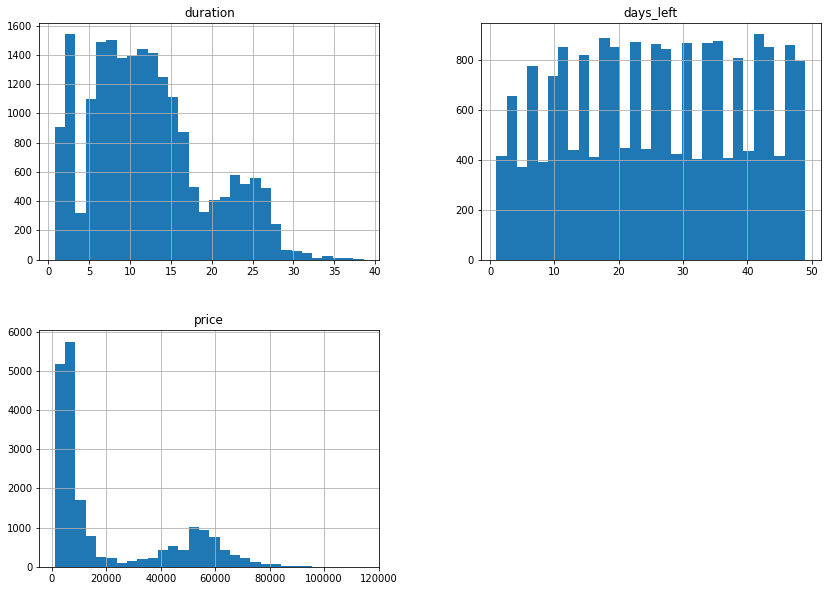

In [13]:
%matplotlib inline
df.hist(bins=30, figsize=(14,10))
plt.show()

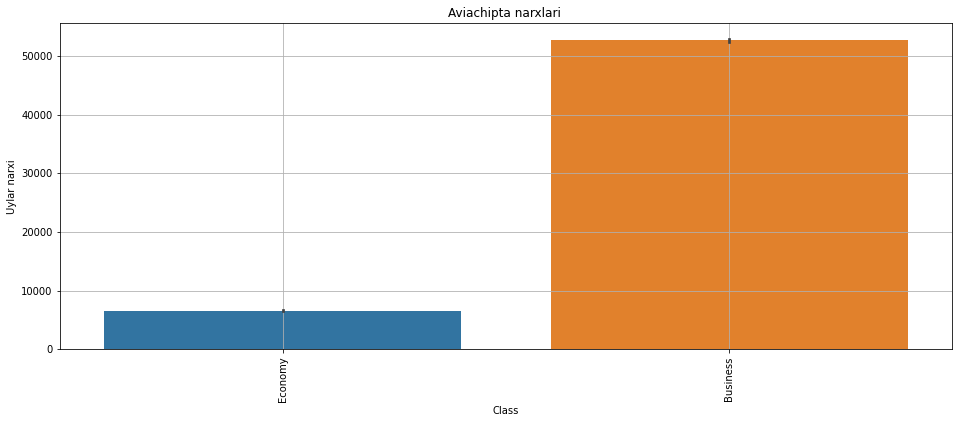

In [14]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['class'] , y=df['price'])

plt.title("Aviachipta narxlari ")
plt.xlabel('Class')
plt.ylabel('Uylar narxi')
plt.xticks(rotation=90)
plt.grid()
plt.show()

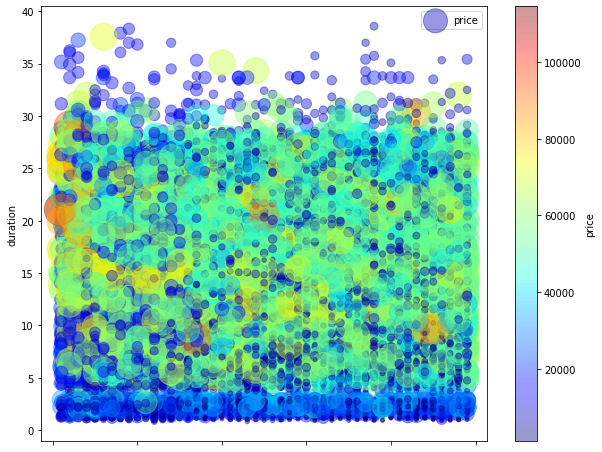

In [15]:
df.plot(
kind='scatter',
x='days_left',
y='duration',
alpha=0.4,
s=df['price']/100,
label='price',
c= 'price', 
cmap='jet',
colorbar=True,
figsize=(10,8)
)
plt.show()

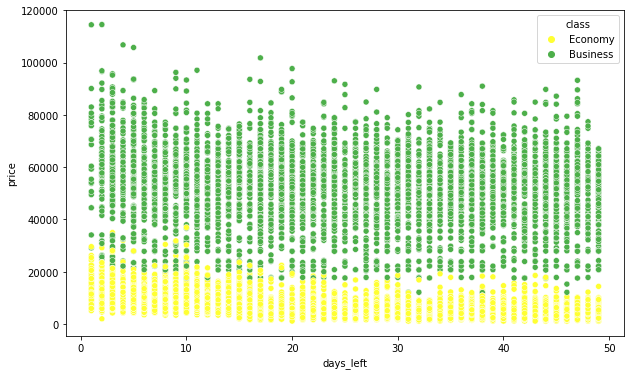

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['days_left'], y=df['price'], hue='class', palette='Set1_r')
plt.show()

# Correlation

In [17]:
df.corrwith(df['price']).sort_values(ascending=False)

price        1.000000
duration     0.213158
days_left   -0.102545
dtype: float64

In [18]:
df.groupby('class').mean()

,duration,days_left,price
class,,,
Business,13.715785,25.472707,52653.102289
Economy,11.478952,26.129208,6564.509852


In [19]:
#data = pd.concat([df,df2])

### **ML ga tayyorgarlik**

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit (n_splits=1, test_size=0.25, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df, df['class']):
    strat_train = df.iloc[train_index]
    strat_test = df.iloc[test_index]
    
X_train = strat_train.drop('price', axis=1)
y = strat_train['price'].copy()

X_test = df2
y_test = strat_test['price'].copy()

X_num =X_train[['duration','days_left']]


In [21]:
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(df, test_size = 0.25 , random_state = 42)

#X_train = train_set.drop('price', axis=1)
#y = train_set['price'].copy()

#X_test = df2
#y_test = test_set['price'].copy()

#X_num =X_train[['duration','days_left']]


### **Sonli ustunlar uchun**

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
          #('min_max_scaler',MinMaxScaler())
          ])


### **Matnli ustunlar uchun va to'liq**

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

num_attribs = list(X_num)
#Ordinal_cat_attribs = ['stops','source_city','departure_time','stops','arrival_time','destination_city','airline']
Onehot_cat_attribs = ['class','stops','source_city','departure_time','stops','arrival_time','destination_city','airline']

full_pipeline = ColumnTransformer([
   ('num', num_pipeline, num_attribs),
 #  ('Ordinal', OrdinalEncoder(), Ordinal_cat_attribs),
   ('Onehot', OneHotEncoder(), Onehot_cat_attribs)                              
])

In [24]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared

<15000x40 sparse matrix of type '<class 'numpy.float64'>'
	with 150000 stored elements in Compressed Sparse Row format>

# **Machine Learning**

## **LinearRegression**

---

In [25]:

from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_prepared, y)
X_test_prepared = full_pipeline.transform(X_test)
y_predicted = LR_model.predict(X_test_prepared)

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))



MAE= 22628.0
RMSE= 31269.0


# **DecisionTree**

---

In [26]:
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)
X_test_prepared = full_pipeline.transform(X_test)
y_predicted_tree = Tree_model.predict(X_test_prepared)
mae = mean_absolute_error(y_test, y_predicted_tree)
mse = mean_squared_error(y_test, y_predicted_tree)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 22798.0
RMSE= 31983.0


## **RandomForest**

---

In [27]:
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)
X_test_prepared = full_pipeline.transform(X_test)
y_predicted_rf = RF_model.predict(X_test_prepared)
mae = mean_absolute_error(y_test, y_predicted_rf)
mse = mean_squared_error(y_test, y_predicted_rf)

print("MAE=", np.around(mae))
print("RMSE=", np.around(np.sqrt(mse)))

MAE= 22583.0
RMSE= 31767.0


# **XTBoost**

In [28]:
xgb_model = XGBRegressor()
xgb_model.fit(X_prepared, y)
X_test_prepared = full_pipeline.transform(X_test)
y_predicted_xgb = xgb_model.predict(X_test_prepared)
mae = mean_absolute_error
mse = mean_squared_error

print('MAE XTBoost_model =', mae(y_test, y_predicted_xgb))
print('RMSE XTBoost_model =', np.sqrt(mse(y_test, y_predicted_xgb)))

MAE XTBoost_model = 22541.24025640869
RMSE XTBoost_model = 31692.067957940006


## **Xulosa**
**Eng yaxshi model RandomForest model ekanligini ko'rdik.Endi shu modelni saqlab olamiz**


In [29]:
sample_solution = pd.read_csv('../input/aviachipta-narxini-bashorat-qilish/sample_solution.csv')
sample_solution['price'] = y_predicted_rf


sample_solution.to_csv("submission.csv", index=False)

pd.read_csv('submission.csv')

,id,price
0,1,55166.97
1,2,58606.32
2,3,23188.88
3,4,2531.11
4,5,5959.07
...,...,...
4995,4996,59851.08
4996,4997,4509.36
4997,4998,50271.00
4998,4999,47498.52
